In [4]:
# Import necessary libraries
import pandas as pd 
import matplotlib.pyplot as plt

# Specify the filename (Excel file)
filename = "System-Data-Quarter-Hourly-2022-2023.xlsx"

# Read the Excel file into a pandas DataFrame for data manipulation
df = pd.read_excel(filename)

<ipython-input-24-066ad70f0707>:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


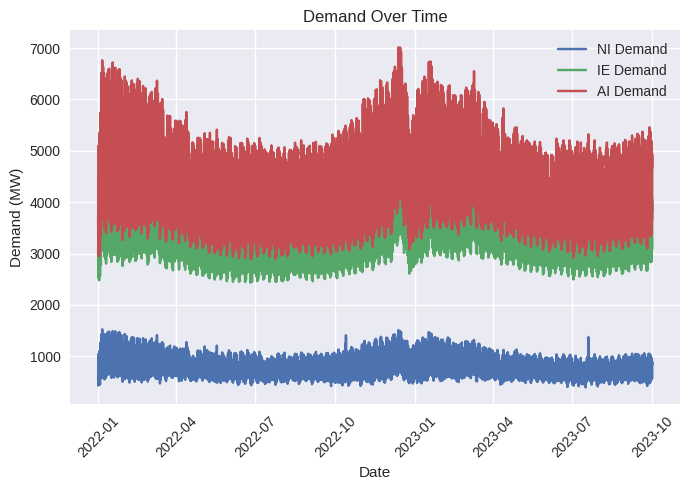

In [24]:

import seaborn as sns #

# Convert 'DateTime' to datetime
df['DateTime'] = pd.to_datetime(df['DateTime'])

# Set up the plotting style, more visually appealing
plt.style.use('seaborn')

# 1. Time series of NI, IE, and AI Demand
plt.figure(figsize=(7,5))
plt.plot(df['DateTime'], df['NI Demand'], label='NI Demand') #NI: Northern Ireland
plt.plot(df['DateTime'], df['IE Demand'], label='IE Demand') #IE: Ireland
plt.plot(df['DateTime'], df['AI Demand'], label='AI Demand') #AI: All Island
plt.title('Demand Over Time')
plt.xlabel('Date')
plt.ylabel('Demand (MW)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

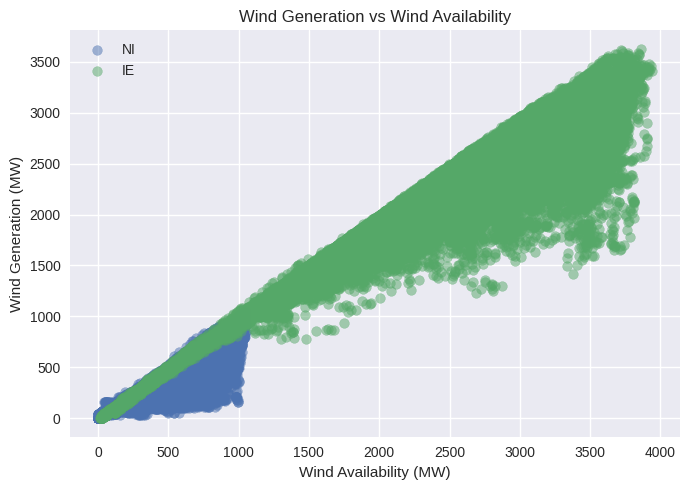

In [25]:
#Scatter plot to visualise how wind generation relates to availability 
# 2. Wind Generation vs Wind Availability
plt.figure(figsize=(7,5))
plt.scatter(df['NI Wind Availability'], df['NI Wind Generation'], alpha=0.5, label='NI')
plt.scatter(df['IE Wind Availability'], df['IE Wind Generation'], alpha=0.5, label='IE')
plt.title('Wind Generation vs Wind Availability')
plt.xlabel('Wind Availability (MW)')
plt.ylabel('Wind Generation (MW)')
plt.legend()
plt.tight_layout()
plt.show()

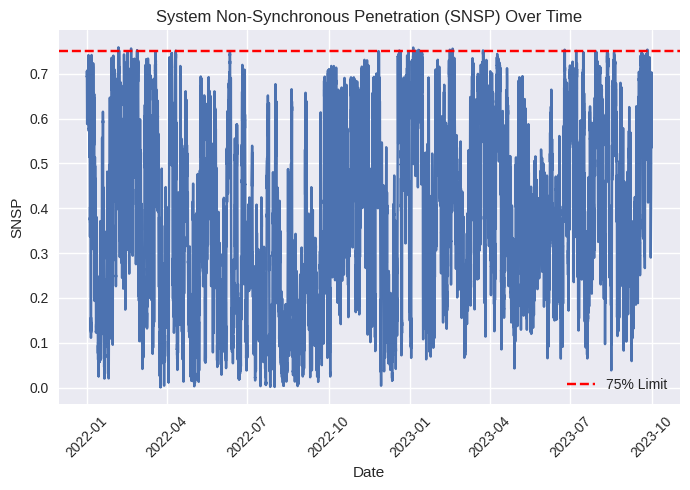

In [26]:
# 3. SNSP (System Non-synchronous Penetration) Analysis
# Plot SNSP over time to see how non-synchronous generation has evolved
plt.figure(figsize=(7,5))
plt.plot(df['DateTime'], df['SNSP'])
plt.axhline(y=0.75, color='r', linestyle='--', label='75% Limit')
plt.title('System Non-Synchronous Penetration (SNSP) Over Time')
plt.xlabel('Date')
plt.ylabel('SNSP')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

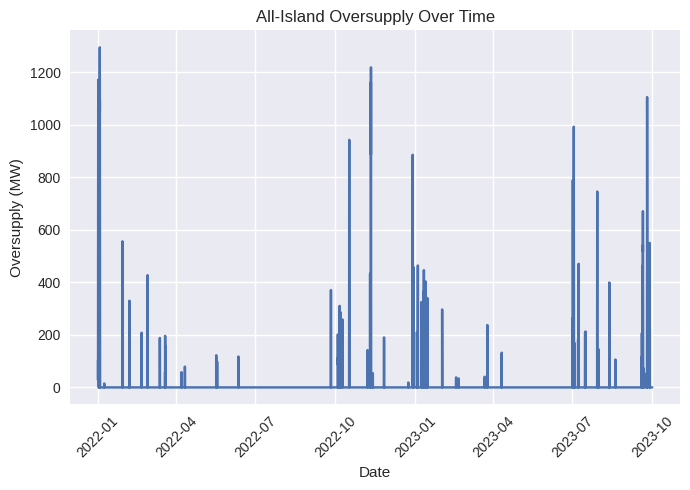

In [29]:
# 4. Oversupply Analysis
# Plot oversupply over time to assess how often energy supply exceeds demand
plt.figure(figsize=(7,5))
plt.plot(df['DateTime'], df['AI Oversupply'])
plt.title('All-Island Oversupply Over Time')
plt.xlabel('Date')
plt.ylabel('Oversupply (MW)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

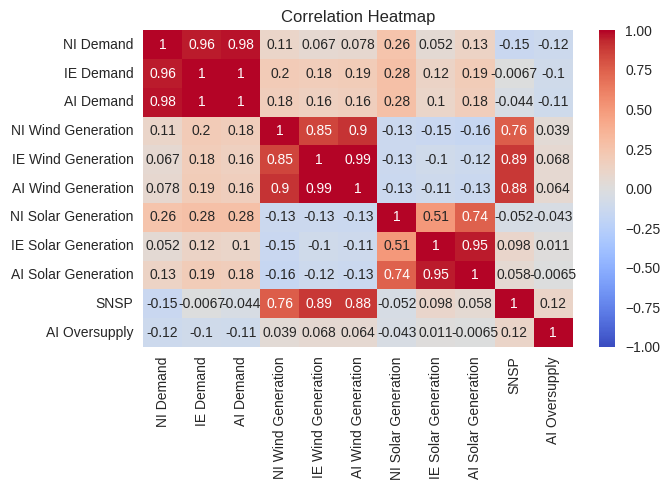

In [30]:
# 5. Correlation Heatmap
# Calculate the correlation between different energy variables and visualize using a heatmap
columns_of_interest = ['NI Demand', 'IE Demand', 'AI Demand',
                       'NI Wind Generation', 'IE Wind Generation', 'AI Wind Generation',
                       'NI Solar Generation', 'IE Solar Generation', 'AI Solar Generation',
                       'SNSP', 'AI Oversupply']
correlation = df[columns_of_interest].corr() # Compute the correlation matrix

#Plot
plt.figure(figsize=(7,5))
sns.heatmap(correlation, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

In [31]:
# Print out descriptive statistics for the selected columns (mean, std, min, max, etc.)
# 6. Summary Statistics
print("\nSummary Statistics:")
print(df[columns_of_interest].describe())


Summary Statistics:
          NI Demand     IE Demand     AI Demand  NI Wind Generation  \
count  61244.000000  61244.000000  61244.000000        61244.000000   
mean     828.619615   3625.781523   4454.401138          289.162221   
std      207.376325    585.454876    785.997511          248.250735   
min      392.571000   2432.240000   2893.140000            0.000000   
25%      643.676250   3125.687500   3767.003250           82.137250   
50%      836.029500   3679.810000   4518.670000          209.400000   
75%      974.974000   4024.080000   4990.409000          465.969750   
max     1523.794000   5522.680000   7014.847000         1056.739000   

       IE Wind Generation  AI Wind Generation  NI Solar Generation  \
count        61244.000000        61244.000000         61244.000000   
mean          1229.243925         1518.406146            15.776330   
std            910.142805         1128.247154            24.765015   
min              0.000000            0.000000             0

In [32]:
# 7. SNSP Limit Exceedance
# Calculate how many times SNSP exceeded the 75% limit and its percentage
snsp_limit_exceedance = (df['SNSP'] > 0.75).sum()
print(f"\nNumber of times SNSP exceeded 75% limit: {snsp_limit_exceedance}")
print(f"Percentage of time SNSP exceeded 75% limit: {snsp_limit_exceedance / len(df) * 100:.2f}%")


Number of times SNSP exceeded 75% limit: 55
Percentage of time SNSP exceeded 75% limit: 0.09%


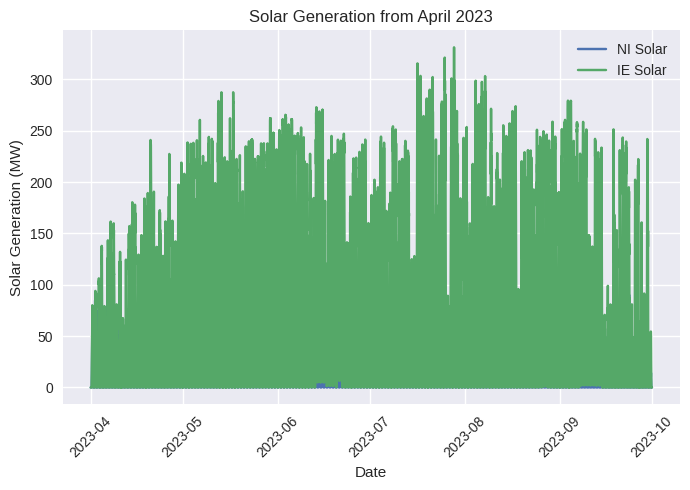

In [33]:
# 8. Solar Energy Analysis (focusing on data from April 2023 onwards)
df_solar = df[df['DateTime'] >= '2023-04-01']
plt.figure(figsize=(7,5))
plt.plot(df_solar['DateTime'], df_solar['NI Solar Generation'], label='NI Solar')
plt.plot(df_solar['DateTime'], df_solar['IE Solar Generation'], label='IE Solar')
plt.title('Solar Generation from April 2023')
plt.xlabel('Date')
plt.ylabel('Solar Generation (MW)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


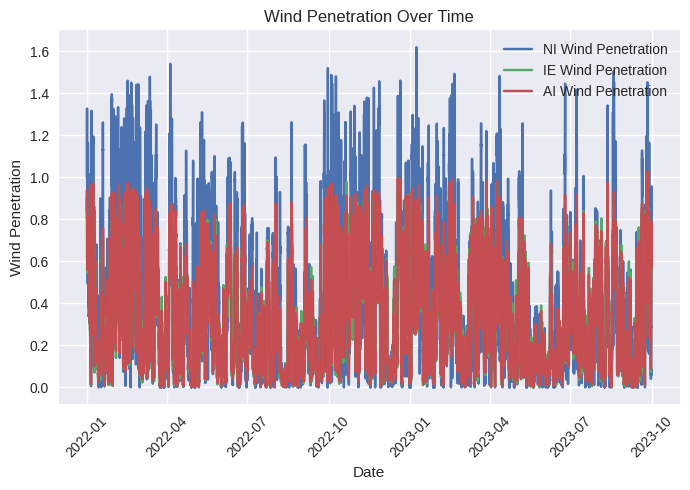

In [34]:
# 9. Wind Penetration Analysis
plt.figure(figsize=(7,5))
plt.plot(df['DateTime'], df['NI Wind Penetration'], label='NI Wind Penetration')
plt.plot(df['DateTime'], df['IE Wind Penetration'], label='IE Wind Penetration')
plt.plot(df['DateTime'], df['AI Wind Penetration'], label='AI Wind Penetration')
plt.title('Wind Penetration Over Time')
plt.xlabel('Date')
plt.ylabel('Wind Penetration')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsm

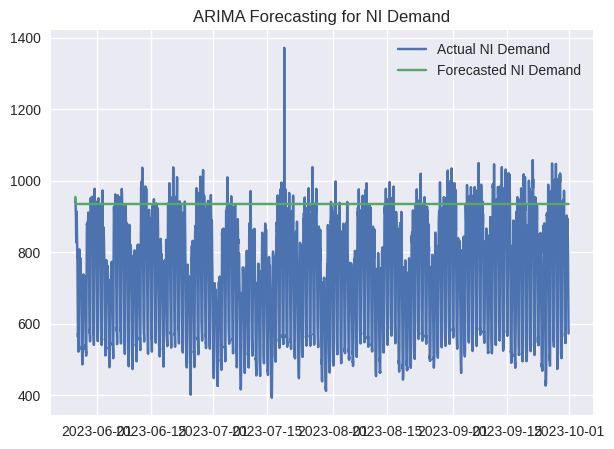

In [35]:
#ARIMA Forcasting for Northern Ireland Demand 
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import train_test_split

# Let's take NI Demand as an example
ni_demand = df.set_index('DateTime')['NI Demand']

# Split data into training and testing
train, test = train_test_split(ni_demand, test_size=0.2, shuffle=False) #20% of the data will be used for testing, and 80% will be used for training. Do not shuffle the data

# Fit the ARIMA model to the training data
model = ARIMA(train, order=(5,1,0)) #Specify ARIMA parameters
model_fit = model.fit()

# Forecast the next steps
forecast = model_fit.forecast(steps=len(test))

# Plot the results
plt.figure(figsize=(7,5))
plt.plot(test.index, test, label='Actual NI Demand')
plt.plot(test.index, forecast, label='Forecasted NI Demand')
plt.legend()
plt.title('ARIMA Forecasting for NI Demand')
plt.show()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
957/957 ━━━━━━━━━━━━━━━━━━━━ 22s 16ms/step - loss: 0.0115
Epoch 2/50
957/957 ━━━━━━━━━━━━━━━━━━━━ 19s 15ms/step - loss: 5.0988e-04
Epoch 3/50
957/957 ━━━━━━━━━━━━━━━━━━━━ 21s 15ms/step - loss: 1.7046e-04
Epoch 4/50
957/957 ━━━━━━━━━━━━━━━━━━━━ 14s 15ms/step - loss: 1.1825e-04
Epoch 5/50
957/957 ━━━━━━━━━━━━━━━━━━━━ 14s 15ms/step - loss: 9.6162e-05
Epoch 6/50
957/957 ━━━━━━━━━━━━━━━━━━━━ 20s 15ms/step - loss: 1.0167e-04
Epoch 7/50
957/957 ━━━━━━━━━━━━━━━━━━━━ 20s 15ms/step - loss: 8.4665e-05
Epoch 8/50
957/957 ━━━━━━━━━━━━━━━━━━━━ 21s 15ms/step - loss: 9.3588e-05
Epoch 9/50
957/957 ━━━━━━━━━━━━━━━━━━━━ 14s 15ms/step - loss: 8.1677e-05
Epoch 10/50
957/957 ━━━━━━━━━━━━━━━━━━━━ 20s 14ms/step - loss: 7.1679e-05
Epoch 11/50
957/957 ━━━━━━━━━━━━━━━━━━━━ 21s 15ms/step - loss: 9.3482e-05
Epoch 12/50
957/957 ━━━━━━━━━━━━━━━━━━━━ 15s 15ms/step - loss: 8.8748e-05
Epoch 13/50
957/957 ━━━━━━━━━━━━━━━━━━━━ 20s 15ms/step - loss: 8.2259e-05
Epoch 14/50
957/957 ━━━━━━━━━━━━━━━━━━━━ 21s 15ms/s

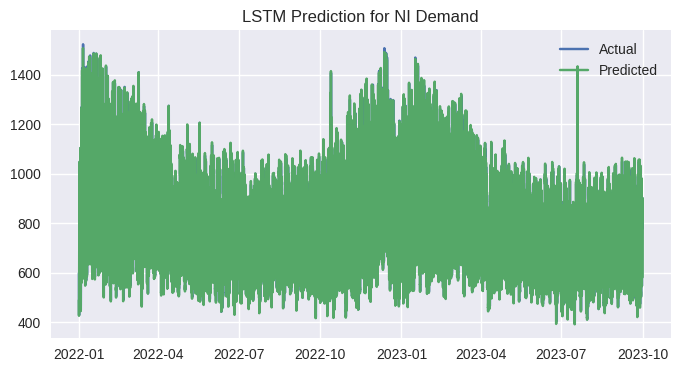

In [19]:
#LSTM for Time Series Forecasting
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Scaling the Northern Ireland Demand data between 0 and 1
scaler = MinMaxScaler()
ni_demand_scaled = scaler.fit_transform(df['NI Demand'].values.reshape(-1,1)) #Normalise the data

# Function to prepare the data for LSTM
def create_dataset(data, time_step=1):
    X, Y = [], []
    for i in range(len(data)-time_step-1):
        X.append(data[i:(i+time_step), 0]) #Create sequences of data
        Y.append(data[i + time_step, 0]) #Target values
    return np.array(X), np.array(Y)

time_step = 10  # Number of time steps to look back for prediction
X, y = create_dataset(ni_demand_scaled, time_step)

# Reshape data to [samples, time steps, features] which LSTM expects
X = X.reshape(X.shape[0], time_step, 1)

# Build the LSTM Model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(time_step, 1)))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X, y, epochs=50, batch_size=64, verbose=1)

# Predictions
predicted = model.predict(X)
predicted = scaler.inverse_transform(predicted)

# Plotting
plt.figure(figsize=(8,4))
plt.plot(df['DateTime'][:len(predicted)], predicted, label='Predicted')
plt.legend()
plt.title('LSTM Prediction for NI Demand')
plt.show()
